In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
data = pd.read_csv("traffic.csv", names = ['file', 'count', 'density'])
del(data['file'])
data = data[1:]
data.head()

,count,density
1.0,11,0.679255
2.0,10,0.553873
3.0,16,0.699004
4.0,10,0.658768
5.0,13,0.691023


In [3]:
len(data)

253

In [4]:
from sklearn.preprocessing import minmax_scale
values = minmax_scale(data)
values

array([[ 0.625     ,  0.86547634],
       [ 0.5625    ,  0.62748897],
       [ 0.9375    ,  0.90296282],
       [ 0.5625    ,  0.82659095],
       [ 0.75      ,  0.88781316],
       [ 0.5625    ,  0.94220241],
       [ 0.625     ,  0.93768176],
       [ 0.875     ,  0.86251567],
       [ 0.5       ,  0.81618127],
       [ 0.875     ,  0.81609579],
       [ 0.5625    ,  0.93313984],
       [ 0.6875    ,  0.87513378],
       [ 0.75      ,  0.92653017],
       [ 0.625     ,  0.86377835],
       [ 0.625     ,  0.79722201],
       [ 0.75      ,  0.80030885],
       [ 0.75      ,  0.83533228],
       [ 0.625     ,  0.77616706],
       [ 0.5625    ,  0.84043946],
       [ 0.75      ,  0.81472975],
       [ 0.625     ,  0.95513594],
       [ 0.75      ,  0.84565418],
       [ 1.        ,  0.96292494],
       [ 1.        ,  0.9221546 ],
       [ 0.6875    ,  0.6986652 ],
       [ 0.8125    ,  0.7570118 ],
       [ 0.6875    ,  0.77369561],
       [ 0.6875    ,  0.87613749],
       [ 0.875     ,

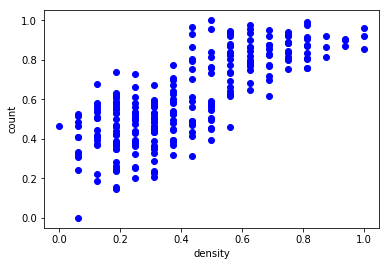

In [5]:
for i in range(len(values)):
    plt.plot(values[i][0], values[i][1], 'bo')
plt.xlabel('density')
plt.ylabel('count')
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters = 3)

In [8]:
kmeans.fit(values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2])

In [10]:
kmeans.cluster_centers_

array([[ 0.19375   ,  0.35605863],
       [ 0.66964286,  0.83880093],
       [ 0.33152174,  0.54836056]])

In [11]:
labels = kmeans.labels_
center = kmeans.cluster_centers_
center

array([[ 0.19375   ,  0.35605863],
       [ 0.66964286,  0.83880093],
       [ 0.33152174,  0.54836056]])

In [12]:
c = [center[i][0]*center[i][1] for i in range(len(center))]
d = sorted(c)
for i in range(len(labels)):
    labels[i] = d.index(c[labels[i]])

In [13]:
d

[0.068986359441858228, 0.18179344633135008, 0.56169705027191086]

In [14]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [15]:
colors = ['go','yo','ro']
for i in range(len(value)):
    plt.plot(values[i][1], values[i][0], colors[labels[i]])
plt.xlabel('density')
plt.ylabel('count')
plt.show()

NameError: name 'value' is not defined

In [77]:
X = []
for _,row in data.iterrows():
    X.append([row['count'], row['density']])
X

[[11.0, 0.67925455932314682],
 [10.0, 0.55387313596386012],
 [16.0, 0.69900395783506275],
 [10.0, 0.65876815352108054],
 [13.0, 0.69102250454640513],
 [10.0, 0.71967697004537534],
 [11.0, 0.71729530706551314],
 [15.0, 0.6776947573130977],
 [9.0, 0.65328391032466027],
 [15.0, 0.65323887519800095],
 [10.0, 0.71490244052948793],
 [12.0, 0.68434249163144945],
 [13.0, 0.71142019891267627],
 [11.0, 0.67835998599859593],
 [11.0, 0.64329540328370804],
 [13.0, 0.64492167406973411],
 [13.0, 0.66337344257925912],
 [11.0, 0.6322028000657135],
 [10.0, 0.66606410969670993],
 [13.0, 0.65251919059302788],
 [11.0, 0.72649087856319661],
 [13.0, 0.66881143671270205],
 [17.0, 0.73059443865195139],
 [17.0, 0.70911497060501583],
 [12.0, 0.59137167070553043],
 [14.0, 0.62211103023233116],
 [12.0, 0.63090073635258859],
 [12.0, 0.68487128599174141],
 [15.0, 0.70855274956966596],
 [11.0, 0.62935728227522025],
 [10.0, 0.57098347848877506],
 [14.0, 0.68492437005200157],
 [9.0, 0.62455226058459923],
 [4.0, 0.44566

In [78]:
labelled_data = []
for i in range(len(values)):
    labelled_data.append([X[i][0], X[i][1], labels[i]])

In [79]:
df = pd.DataFrame(labelled_data)
df.to_csv('labelled_data.csv', header=None, index=None)